In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pywt
from BcomMEG import *
dir = '/Volumes/@neurospeech/PROJECTS/BCI/BCOM/DATA_ANALYZED/EVOKED/DATA/WITHOUT_BADS/COVERT'
epo_files = []
subjects = ['BCOM_18_2']
avoid_reading = True

data = BcomMEG(dir=dir, subjects=subjects, avoid_reading=avoid_reading)

In [12]:
re_1_1 = data.data['BCOM_18_2']['re_144'][0][0]
re_to_smooth = re_1_1.get_data()

In [34]:
#discrete wavelet transform 
def dwt_denoise(data, wavelet='db4', level=7):
    coefficients = pywt.wavedec(data, wavelet, level=level)
    coefficients[0] = np.zeros_like(coefficients[0]) #d1 #get rid of these two as in Dash et al 2020.
    coefficients[1] = np.zeros_like(coefficients[1]) #d2
    #thresholding - this is not described in the paper but the 7 level doesn't work without it. So, I should ask about this step.
    threshold = np.sqrt(2 * np.log(len(data))) * np.std(coefficients[-1])
    coefficients = [pywt.threshold(c, threshold, mode='soft') for c in coefficients]
    return pywt.waverec(coefficients, wavelet)[:len(data)]


In [35]:
denoized_epochs = np.zeros_like(re_to_smooth)
for epoch_idx in range(re_to_smooth.shape[0]):
    for channel_idx in range(re_to_smooth.shape[1]):
        signal = re_to_smooth[epoch_idx, channel_idx, :]
        denoized_epochs[epoch_idx, channel_idx, :] = dwt_denoise(signal, wavelet='db4', level=7)



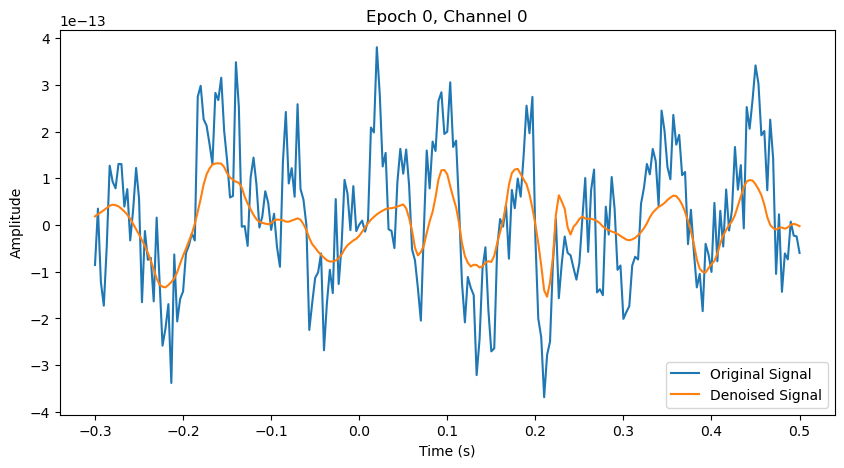

In [36]:
import matplotlib.pyplot as plt

epoch_idx = 0  # Select an epoch
channel_idx = 0  # Select a channel

plt.figure(figsize=(10, 5))
plt.plot(re_1_1.times, re_to_smooth[epoch_idx, channel_idx, :], label="Original Signal")
plt.plot(re_1_1.times, denoized_epochs[epoch_idx, channel_idx, :], label="Denoised Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.title(f"Epoch {epoch_idx}, Channel {channel_idx}")
plt.show()